# Assignment 3: Simulated Annealing

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

## This section implements the Boltzmann distribution function

Method used is taken from 'Simple and synergistic ways to understand the Boltzmann distribution function'

### Plot using Exponential notationm

In [3]:
# Define sample size
N = 100
A = []

for i in range(N-1):
    A.append(np.random.random())

In [4]:
# Sort list
A.sort()
A.insert(0,0)
A.insert(len(A),1)

In [5]:
# Create plots for differnt values of lambda
A = np.array(A)
expBlue = np.exp(-1 * A)
expGreen = np.exp(-2 * A)
expRed = np.exp(-5 * A)

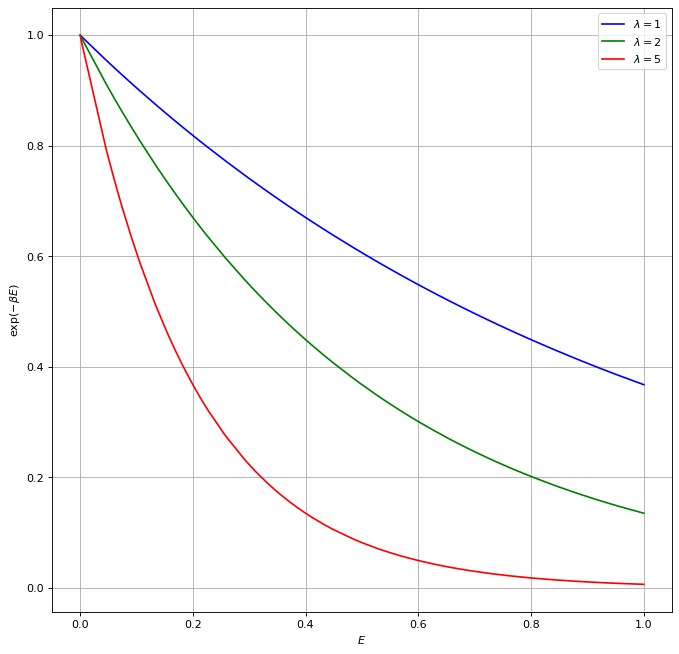

In [6]:
# Plot distributions
plt.figure(figsize=(10,10), dpi = 80)

plt.plot(A, expBlue, 'blue', label = r'$\lambda = 1$')
plt.plot(A, expGreen, 'green', label = r'$\lambda = 2$')
plt.plot(A, expRed, 'red', label = r'$\lambda = 5$')

plt.xlabel(r'$E$')
plt.ylabel(r'exp($-\beta E$)')

plt.xticks(np.arange(0,1.2,0.2))
plt.yticks(np.arange(0,1.2,0.2))
plt.grid()
plt.legend()



plt.show()

### Boltzmann distribution function

In [7]:
# Generate Boltzmann Distributions for various sample sizes

N = [5,10, 20]

for n in N:
    E_tot = []
    for i in range(10000):

        # Store N-1 random numbers in an array
        A = np.random.sample(n - 1)

        # Sort
        A = A.tolist()
        A.sort()

        # Append 0 and total energy
        A.insert(0,0)
        A.insert(len(A),1)

        # Compute energy of particle by substracting the consecutive values of A
        E = []
        for i in range(len(A)-1):
            E.append(A[i+1] - A[i])

        E_tot.append(E)

    
    if n == 5:
        flat_E_five = [item for sublist in E_tot for item in sublist]
    if n == 10:
        flat_E_ten = [item for sublist in E_tot for item in sublist]
    if n == 20:
        flat_E_twenty = [item for sublist in E_tot for item in sublist]

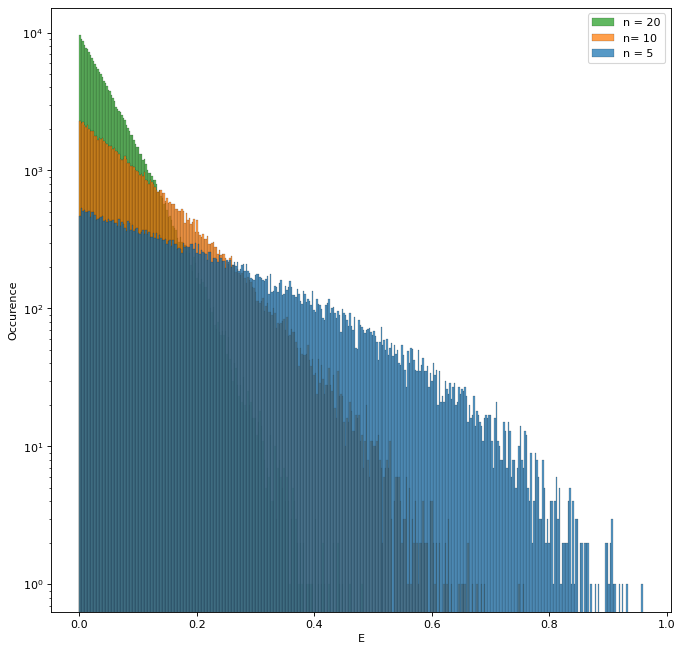

In [8]:
# This plots the data
plt.figure(figsize=(10,10), dpi = 80)

g = sns.histplot([flat_E_five, flat_E_ten,flat_E_twenty])
g.set_yscale('log')
g.set(xlabel = 'E', ylabel =  'Occurence')
plt.legend(labels=["n = 20", "n= 10", "n = 5"])

plt.show()

## This section plots the distribution of cities

In [10]:
# Import data
EI51 = [[37, 52], [49, 49], [52, 64], [20, 26], [40, 30], [21, 47], [17, 63], [31, 62], [52, 33], [51, 21], [42, 41], [31, 32], [5, 25], [12, 42], [36, 16], [52, 41], [27, 23], [17, 33], [13, 13], [57, 58], [62, 42], [42, 57], [16, 57], [8, 52], [7, 38], [27, 68], [30, 48], [43, 67], [58, 48], [58, 27], [37, 69], [38, 46], [46, 10], [61, 33], [62, 63], [63, 69], [32, 22], [45, 35], [59, 15], [5, 6], [10, 17], [21, 10], [5, 64], [30, 15], [39, 10], [32, 39], [25, 32], [25, 55], [48, 28], [56, 37], [30, 40]]
A280 = [[288, 149], [288, 129], [270, 133], [256, 141], [256, 157], [246, 157], [236, 169], [228, 169], [228, 161], [220, 169], [212, 169], [204, 169], [196, 169], [188, 169], [196, 161], [188, 145], [172, 145], [164, 145], [156, 145], [148, 145], [140, 145], [148, 169], [164, 169], [172, 169], [156, 169], [140, 169], [132, 169], [124, 169], [116, 161], [104, 153], [104, 161], [104, 169], [90, 165], [80, 157], [64, 157], [64, 165], [56, 169], [56, 161], [56, 153], [56, 145], [56, 137], [56, 129], [56, 121], [40, 121], [40, 129], [40, 137], [40, 145], [40, 153], [40, 161], [40, 169], [32, 169], [32, 161], [32, 153], [32, 145], [32, 137], [32, 129], [32, 121], [32, 113], [40, 113], [56, 113], [56, 105], [48, 99], [40, 99], [32, 97], [32, 89], [24, 89], [16, 97], [16, 109], [8, 109], [8, 97], [8, 89], [8, 81], [8, 73], [8, 65], [8, 57], [16, 57], [8, 49], [8, 41], [24, 45], [32, 41], [32, 49], [32, 57], [32, 65], [32, 73], [32, 81], [40, 83], [40, 73], [40, 63], [40, 51], [44, 43], [44, 35], [44, 27], [32, 25], [24, 25], [16, 25], [16, 17], [24, 17], [32, 17], [44, 11], [56, 9], [56, 17], [56, 25], [56, 33], [56, 41], [64, 41], [72, 41], [72, 49], [56, 49], [48, 51], [56, 57], [56, 65], [48, 63], [48, 73], [56, 73], [56, 81], [48, 83], [56, 89], [56, 97], [104, 97], [104, 105], [104, 113], [104, 121], [104, 129], [104, 137], [104, 145], [116, 145], [124, 145], [132, 145], [132, 137], [140, 137], [148, 137], [156, 137], [164, 137], [172, 125], [172, 117], [172, 109], [172, 101], [172, 93], [172, 85], [180, 85], [180, 77], [180, 69], [180, 61], [180, 53], [172, 53], [172, 61], [172, 69], [172, 77], [164, 81], [148, 85], [124, 85], [124, 93], [124, 109], [124, 125], [124, 117], [124, 101], [104, 89], [104, 81], [104, 73], [104, 65], [104, 49], [104, 41], [104, 33], [104, 25], [104, 17], [92, 9], [80, 9], [72, 9], [64, 21], [72, 25], [80, 25], [80, 25], [80, 41], [88, 49], [104, 57], [124, 69], [124, 77], [132, 81], [140, 65], [132, 61], [124, 61], [124, 53], [124, 45], [124, 37], [124, 29], [132, 21], [124, 21], [120, 9], [128, 9], [136, 9], [148, 9], [162, 9], [156, 25], [172, 21], [180, 21], [180, 29], [172, 29], [172, 37], [172, 45], [180, 45], [180, 37], [188, 41], [196, 49], [204, 57], [212, 65], [220, 73], [228, 69], [228, 77], [236, 77], [236, 69], [236, 61], [228, 61], [228, 53], [236, 53], [236, 45], [228, 45], [228, 37], [236, 37], [236, 29], [228, 29], [228, 21], [236, 21], [252, 21], [260, 29], [260, 37], [260, 45], [260, 53], [260, 61], [260, 69], [260, 77], [276, 77], [276, 69], [276, 61], [276, 53], [284, 53], [284, 61], [284, 69], [284, 77], [284, 85], [284, 93], [284, 101], [288, 109], [280, 109], [276, 101], [276, 93], [276, 85], [268, 97], [260, 109], [252, 101], [260, 93], [260, 85], [236, 85], [228, 85], [228, 93], [236, 93], [236, 101], [228, 101], [228, 109], [228, 117], [228, 125], [220, 125], [212, 117], [204, 109], [196, 101], [188, 93], [180, 93], [180, 101], [180, 109], [180, 117], [180, 125], [196, 145], [204, 145], [212, 145], [220, 145], [228, 145], [236, 145], [246, 141], [252, 125], [260, 129], [280, 133]]
PCB442 = [[200, 400], [200, 500], [200, 600], [200, 700], [200, 800], [200, 900], [200, 1000], [200, 1100], [200, 1200], [200, 1300], [200, 1400], [200, 1500], [200, 1600], [200, 1700], [200, 1800], [200, 1900], [200, 2000], [200, 2100], [200, 2200], [200, 2300], [200, 2400], [200, 2500], [200, 2600], [200, 2700], [200, 2800], [200, 2900], [200, 3000], [200, 3100], [200, 3200], [200, 3300], [200, 3400], [200, 3500], [200, 3600], [300, 400], [300, 500], [300, 600], [300, 700], [300, 800], [300, 900], [300, 1000], [300, 1100], [300, 1200], [300, 1300], [300, 1400], [300, 1500], [300, 1600], [300, 1700], [300, 1800], [300, 1900], [300, 2000], [300, 2100], [300, 2200], [300, 2300], [300, 2400], [300, 2500], [300, 2600], [300, 2700], [300, 2800], [300, 2900], [300, 3000], [300, 3100], [300, 3200], [300, 3300], [300, 3400], [300, 3500], [400, 400], [400, 500], [400, 600], [400, 700], [400, 800], [400, 900], [400, 1000], [400, 1100], [400, 1200], [400, 1300], [400, 1400], [400, 1500], [400, 1600], [400, 1700], [400, 1800], [400, 1900], [400, 2000], [400, 2100], [400, 2200], [400, 2300], [400, 2400], [400, 2500], [400, 2600], [400, 2700], [400, 2800], [400, 2900], [400, 3000], [400, 3100], [400, 3200], [400, 3300], [400, 3400], [400, 3500], [400, 3600], [500, 1500], [500, 1829], [500, 3100], [600, 400], [700, 300], [700, 600], [700, 1500], [700, 1600], [700, 1800], [700, 2100], [700, 2400], [700, 2700], [700, 3000], [700, 3300], [700, 3600], [800, 300], [800, 600], [800, 1030], [800, 1500], [800, 1800], [800, 2100], [800, 2400], [800, 2600], [800, 2700], [800, 3000], [800, 3300], [800, 3600], [900, 300], [900, 600], [900, 1500], [900, 1800], [900, 2100], [900, 2400], [900, 2700], [900, 3000], [900, 3300], [900, 3600], [1000, 300], [1000, 600], [1000, 1100], [1000, 1500], [1000, 1629], [1000, 1800], [1000, 2100], [1000, 2400], [1000, 2600], [1000, 2700], [1000, 3000], [1000, 3300], [1000, 3600], [1100, 300], [1100, 600], [1100, 700], [1100, 900], [1100, 1500], [1100, 1800], [1100, 2100], [1100, 2400], [1100, 2700], [1100, 3000], [1100, 3300], [1100, 3600], [1200, 300], [1200, 600], [1200, 1500], [1200, 1700], [1200, 1800], [1200, 2100], [1200, 2400], [1200, 2700], [1200, 3000], [1200, 3300], [1200, 3600], [1300, 300], [1300, 600], [1300, 700], [1300, 1130], [1300, 1500], [1300, 1800], [1300, 2100], [1300, 2200], [1300, 2400], [1300, 2700], [1300, 3000], [1300, 3300], [1300, 3600], [1400, 300], [1400, 600], [1400, 930], [1400, 1500], [1400, 1800], [1400, 2000], [1400, 2100], [1400, 2400], [1400, 2500], [1400, 2700], [1400, 2820], [1400, 2900], [1400, 3000], [1400, 3300], [1400, 3600], [1500, 1500], [1500, 1800], [1500, 1900], [1500, 2100], [1500, 2400], [1500, 2700], [1500, 2800], [1500, 2860], [1500, 3000], [1500, 3300], [1500, 3600], [1600, 1100], [1600, 1300], [1600, 1500], [1600, 1800], [1600, 2100], [1600, 2400], [1600, 2700], [1600, 3000], [1600, 3300], [1600, 3600], [1700, 1200], [1700, 1500], [1700, 1800], [1700, 2100], [1700, 2400], [1700, 3600], [1800, 300], [1800, 600], [1800, 1230], [1800, 1500], [1800, 1800], [1800, 2100], [1800, 2400], [1900, 300], [1900, 600], [1900, 3000], [1900, 3520], [2000, 300], [2000, 370], [2000, 600], [2000, 800], [2000, 900], [2000, 1000], [2000, 1100], [2000, 1200], [2000, 1300], [2000, 1400], [2000, 1500], [2000, 1600], [2000, 1700], [2000, 1800], [2000, 1900], [2000, 2000], [2000, 2100], [2000, 2200], [2000, 2300], [2000, 2400], [2000, 2500], [2000, 2600], [2000, 2700], [2000, 2800], [2000, 2900], [2000, 3000], [2000, 3100], [2000, 3500], [2100, 300], [2100, 600], [2100, 3200], [2200, 300], [2200, 469], [2200, 600], [2200, 3200], [2300, 300], [2300, 600], [2300, 3400], [2400, 300], [2400, 600], [2400, 2100], [2500, 300], [2500, 800], [2600, 400], [2600, 500], [2600, 800], [2600, 900], [2600, 1000], [2600, 1100], [2600, 1200], [2600, 1300], [2600, 1400], [2600, 1500], [2600, 1600], [2600, 1700], [2600, 1800], [2600, 1900], [2600, 2000], [2600, 2100], [2600, 2200], [2600, 2300], [2600, 2400], [2600, 2500], [2600, 2600], [2600, 2700], [2600, 2800], [2600, 2900], [2600, 3000], [2600, 3100], [2600, 3400], [2700, 700], [2700, 800], [2700, 900], [2700, 1000], [2700, 1100], [2700, 1200], [2700, 1300], [2700, 1400], [2700, 1500], [2700, 1600], [2700, 1700], [2700, 1800], [2700, 1900], [2700, 2000], [2700, 2100], [2700, 2200], [2700, 2300], [2700, 2500], [2700, 2600], [2700, 2700], [2700, 2800], [2700, 2900], [2700, 3000], [2700, 3100], [2700, 3200], [2700, 3300], [2700, 3400], [2700, 3500], [2700, 3600], [2700, 3700], [2700, 3800], [2800, 900], [2800, 1130], [2900, 400], [2900, 500], [2900, 1400], [2900, 2400], [2900, 3000], [3000, 700], [3000, 800], [3000, 900], [3000, 1000], [3000, 1100], [3000, 1200], [3000, 1300], [3000, 1500], [3000, 1600], [3000, 1700], [3000, 1800], [3000, 1900], [3000, 2000], [3000, 2100], [3000, 2200], [3000, 2300], [3000, 2500], [3000, 2600], [3000, 2700], [3000, 2800], [3000, 2900], [3000, 3000], [3000, 3100], [3000, 3200], [3000, 3300], [3000, 3400], [3000, 3500], [3000, 3600], [3000, 3700], [3000, 3800], [150, 3500], [150, 3550], [469, 2550], [469, 3350], [469, 3450], [540, 2330], [540, 2430], [620, 3650], [620, 3709], [750, 2550], [850, 520], [850, 700], [850, 2280], [939, 740], [950, 2220], [910, 2600], [1050, 1050], [1150, 1350], [1170, 2280], [1220, 2210], [1350, 750], [1350, 1700], [1350, 2140], [1450, 770], [1550, 300], [1550, 500], [1550, 1850], [1650, 1050], [1690, 2680], [1710, 310], [1710, 510], [1750, 750], [1790, 2580], [1720, 2610], [1790, 3330], [1720, 3409], [1829, 2700], [1829, 2800], [1829, 3450], [2060, 1650], [2050, 3150], [2170, 1900], [2110, 2000], [2120, 2750], [2150, 3250], [2290, 1400], [2220, 2820], [2280, 3250], [2390, 1300], [2320, 1500], [2450, 710], [2620, 3650], [2750, 520], [2760, 2360], [2850, 2200], [2850, 2700], [2850, 3350], [2930, 950], [2950, 1750], [2950, 2050], [520, 3200], [2300, 3500], [2320, 3150], [530, 2100], [2550, 710], [750, 490], [0, 0]]

EI51 = np.array(EI51)
A280 = np.array(A280)
PCB442 = np.array(PCB442)

In [11]:
x51 = EI51.T[0]
y51 = EI51.T[1]

x280 = A280.T[0]
y280 = A280.T[1]

x442 = PCB442.T[0]
y442 = PCB442.T[1]

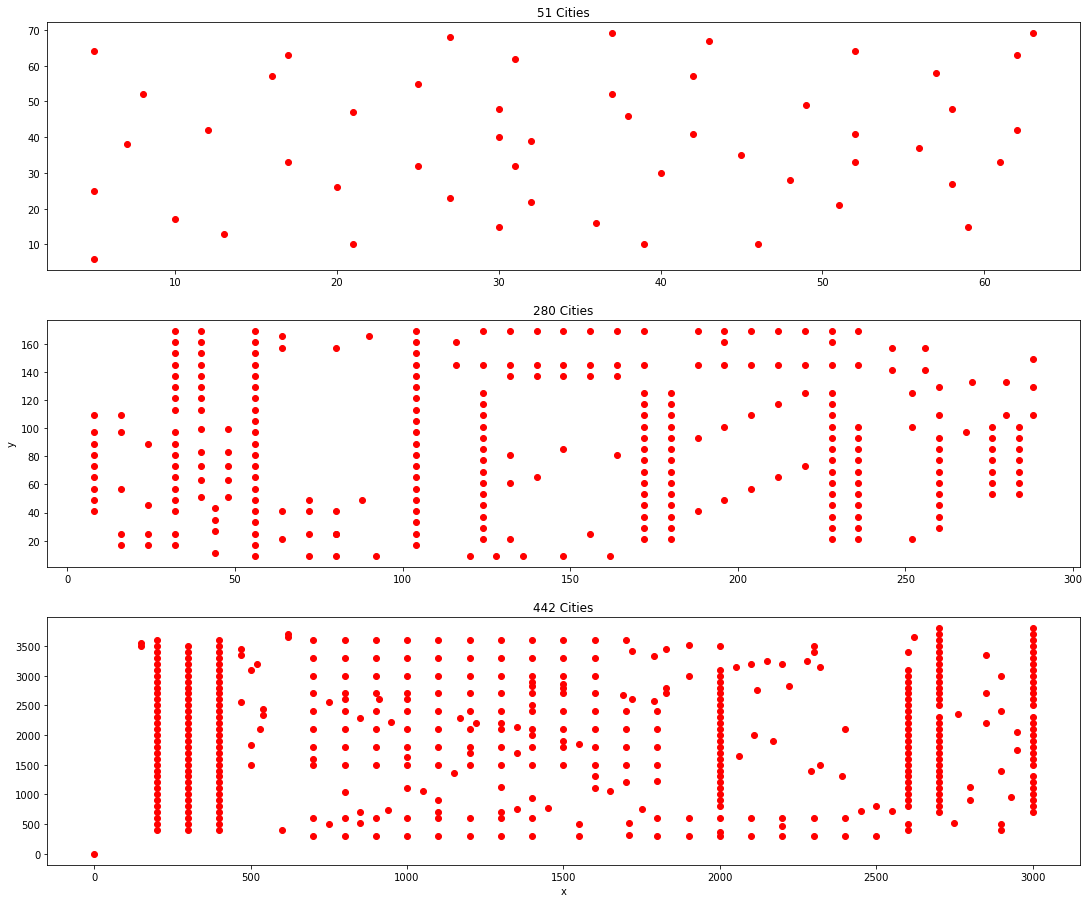

In [12]:
fig, axs = plt.subplots(3)
fig.set_size_inches(18.5, 15.5)


axs[0].plot(x51,y51 , 'ro')
axs[0].set_title("51 Cities")
axs[1].plot(x280,y280 , 'ro')
axs[1].set_title("280 Cities")
axs[2].plot(x442,y442, 'ro')
axs[2].set_title("442 Cities")
axs[2].set_xlabel("x")
axs[1].set_ylabel("y")


plt.show()


## Graph Drawing Functions

In [163]:
'''
This implements a graph drawer function. This can be used to make a visual how the algorithm works
If lines == True then the route will be drawn
'''

def graph_drawer(current_tour, original_data, lines, points):
    if lines == False:
        
        original_data_x = original_data.T[0]
        original_data_y = original_data.T[1]
        
        plt.plot(original_data_x, original_data_y ,'ro')
    
    if lines == True and points == True:
        
        original_data_x = original_data.T[0]
        original_data_y = original_data.T[1]        
        plt.plot(original_data_x, original_data_y ,'ro')
        
        for i in range(len(current_tour)):
            plt.annotate(current_tour[i], (original_data[current_tour[i]][0],original_data[current_tour[i]][1]) )
        
        for i in range(len(current_tour) - 1):
            
            x_values = [original_data[current_tour[i + 1]][0], original_data[current_tour[i]][0]]
            y_values = [original_data[current_tour[i + 1]][1], original_data[current_tour[i]][1]]
            
            plt.plot(x_values, y_values)

        plt.title(f' Tour length of: {tour_length(current_tour, original_data)}')
        
    else:
        original_data_x = original_data.T[0]
        original_data_y = original_data.T[1]        
        plt.plot(original_data_x, original_data_y ,'ro')
        
        for i in range(len(current_tour) - 1):
            
            x_values = [original_data[current_tour[i + 1]][0], original_data[current_tour[i]][0]]
            y_values = [original_data[current_tour[i + 1]][1], original_data[current_tour[i]][1]]
            
            plt.plot(x_values, y_values)
        
        plt.title(f' Tour length of: {tour_length(current_tour, original_data)}') 

In [161]:
'''
This implents a function which computes tour length
'''

def tour_length(current_tour, original_data):
    
    # Tour length starts at 0
    length = 0
    
    # This calculates length of tour by using current_tour to index original data
    for i in range(len(current_tour)-1):
        length = length + np.sqrt(
            (original_data[current_tour[i + 1]][0] - original_data[current_tour[i]][0])**2 + 
            (original_data[current_tour[i + 1]][1] - original_data[current_tour[i]][1])**2)
    
    # To complete the loop
    length = length +  np.sqrt(
            (original_data[current_tour[0]][0] - original_data[current_tour[-1]][0])**2 + 
            (original_data[current_tour[0]][1] - original_data[current_tour[-1]][1])**2)
    
    return length

### Examples

[32 46 20 27 28 49 50  1  7 38 47 39 40  8 26 24 35 17 18 22 45 10 16  4
  9 11 15 44  2 12 23 25  5 19 21 30 29 41 48  0 31  6  3 43 14 34 13 33
 42 36 37 32]


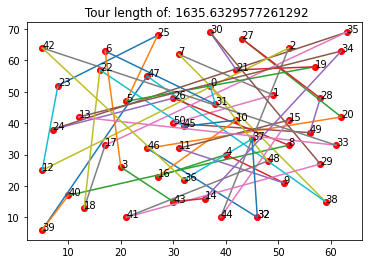

In [164]:
test = np.arange(0, 51)
np.random.shuffle(test)
test = np.append(test, test[0])
print(test)
graph_drawer(test, EI51, True, True)

## Simulated Annealing

Implmentation of first half of algorithm. For now 2opt is exchanged for random swapping and gets stuck at local mimimum

In [165]:
'''
This preforms a random swap
'''

def swapping(current_tour, original_data):
    
    tour = np.arange(0,len(current_tour))
    
    a = np.random.randint(1,len(current_tour)-1)
    b = np.random.randint(1,len(current_tour)-1)
    
    while a == b:
        a = np.random.randint(1,len(current_tour)-1)
        b = np.random.randint(1,len(current_tour)-1)
        
    # Save old data

    new_tour = np.copy(current_tour)
    old_a = current_tour[a]
    old_b = current_tour[b]
    
    new_tour[b] = old_a
    new_tour[a] = old_b
    
    return new_tour

In [166]:
'''
This implements the simulated annealing algorithm
'''

def simulated_annealing(current_tour, original_data, n, T):
    '''
    Current tour is the initial tour
    Original data is raw data
    n defines the length of T
    T is cooling schedule
    '''
    
    
    ct = current_tour
    i = 1
    
    while i < n:
        print(ct)

        # Step 0: Generate random TSP tour and set i = 1
        
        print(f"first {i, tour_length(ct, original_data)}")
        
        # Step 1. Execute one step of the 2-OPT and evaluted delta C
        
        nt = deepcopy(swapping(ct, original_data))
        ntl = tour_length(nt, original_data)     

        print(f'{i}, {tour_length(ct, original_data)-ntl} = {ntl} - {tour_length(ct, original_data)}\n')
        
        if  ntl - tour_length(ct, original_data) < 0:
            # Go to step 3.
            # Accept exchange and compute new value of objective funciton
            ct = np.copy(nt)
            i = i + 1
            print(f"New item in loop{i,tour_length(ct, original_data)}\n")
            print(ct)
            print()
            print()
        else:
            print('repeat')
    
        
    # Cooling schedule finished: return tour
    print('done')
    return ct

[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -42.32156390935745 = 567.9182988817647 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -95.4889367019565 = 621.0856716743638 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -35.62459766871473 = 561.221332641122 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -8.874771400379359 = 

first (1, 525.5967349724073)
1, -149.84979026487542 = 675.4465252372827 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -64.82646526053315 = 590.4232002329404 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -26.554475170045293 = 552.1512101424526 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -40.56895477306455 = 566.1656897454718 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 


repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -69.1586742359442 = 594.7554092083515 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -105.51564558517873 = 631.112380557586 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -110.36409485636966 = 635.9608298287769 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -197.171210

first (1, 525.5967349724073)
1, -95.3155158031069 = 620.9122507755142 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -180.93039872681686 = 706.5271336992241 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -77.91918155615974 = 603.515916528567 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -137.79990183099756 = 663.3966368034048 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39


repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -193.0434444788583 = 718.6401794512656 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -122.006968522904 = 647.6037034953113 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -29.83988341450788 = 555.4366183869151 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -96.01476393


repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -35.62459766871473 = 561.221332641122 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -140.46811068450495 = 666.0648456569122 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -47.70712826944748 = 573.3038632418547 - 525.5967349724073

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 40 18 41 39  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (1, 525.5967349724073)
1, -131.947644


repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 18 41 40  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (2, 525.507251267133)
2, -62.109210229213545 = 587.6164614963466 - 525.507251267133

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 18 41 40  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (2, 525.507251267133)
2, -74.8145927481936 = 600.3218440153266 - 525.507251267133

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 18 41 40  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (2, 525.507251267133)
2, -237.11949565970065 = 762.6267469268337 - 525.507251267133

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 18 41 40  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (2, 525.507251267133)
2, -37.5944906188345

2, -133.94226266370435 = 659.4495139308374 - 525.507251267133

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 18 41 40  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (2, 525.507251267133)
2, -69.97635410346663 = 595.4836053705997 - 525.507251267133

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 18 41 40  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (2, 525.507251267133)
2, -2.210734393725943 = 527.717985660859 - 525.507251267133

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 18 41 40  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (2, 525.507251267133)
2, -128.20366989268098 = 653.710921159814 - 525.507251267133

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 18 41 40  0 21 27 30  7 25  6 22 23 42
  2 1

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 18 41 40  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (2, 525.507251267133)
2, -54.954563903243866 = 580.4618151703769 - 525.507251267133

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 18 41 40  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (2, 525.507251267133)
2, -47.93885403602815 = 573.4461053031612 - 525.507251267133

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 18 41 40  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (2, 525.507251267133)
2, -93.57397063343728 = 619.0812219005703 - 525.507251267133

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 18 41 40  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (2, 525.507251267133)
2, -196.0373696350906

3, -58.66726085188827 = 581.998383998352 - 523.3311231464637

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 41 18 40  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (3, 523.3311231464637)
3, -21.834140608421876 = 545.1652637548856 - 523.3311231464637

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 41 18 40  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (3, 523.3311231464637)
3, -148.63987599333757 = 671.9709991398013 - 523.3311231464637

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 41 18 40  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (3, 523.3311231464637)
3, -107.04137375139453 = 630.3724968978582 - 523.3311231464637

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 41 18 40  0 21 27 30  7 25  6 22 23


repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (4, 519.6620845154754)
4, -161.08367749336173 = 680.7457620088371 - 519.6620845154754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (4, 519.6620845154754)
4, -61.277652932731485 = 580.9397374482069 - 519.6620845154754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (4, 519.6620845154754)
4, -87.37877455431055 = 607.0408590697859 - 519.6620845154754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (4, 519.6620845154754)
4, -126.7583

4, -162.61079868369472 = 682.2728831991701 - 519.6620845154754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (4, 519.6620845154754)
4, -56.46422110279093 = 576.1263056182663 - 519.6620845154754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (4, 519.6620845154754)
4, -146.03229469044925 = 665.6943792059246 - 519.6620845154754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (4, 519.6620845154754)
4, -187.83254181215432 = 707.4946263276297 - 519.6620845154754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 22 2

first (4, 519.6620845154754)
4, -25.04409115718022 = 544.7061756726556 - 519.6620845154754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (4, 519.6620845154754)
4, -183.26533204790792 = 702.9274165633833 - 519.6620845154754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (4, 519.6620845154754)
4, -44.524203773791555 = 564.1862882892669 - 519.6620845154754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 22 23 42
  2 19 34 35  0]
first (4, 519.6620845154754)
4, -62.528620331238585 = 582.190704846714 - 519.6620845154754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 19 34 35  0]
first (5, 515.295158205754)
5, -153.38841156305148 = 668.6835697688055 - 515.295158205754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 19 34 35  0]
first (5, 515.295158205754)
5, -102.5903687159157 = 617.8855269216697 - 515.295158205754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 19 34 35  0]
first (5, 515.295158205754)
5, -207.88602076264442 = 723.1811789683984 - 515.295158205754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 19 34 35  0]
first (5, 515.295158205754)
5, -131.582489685313

5, -79.46975785858535 = 594.7649160643393 - 515.295158205754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 19 34 35  0]
first (5, 515.295158205754)
5, -196.35523401180058 = 711.6503922175546 - 515.295158205754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 19 34 35  0]
first (5, 515.295158205754)
5, -172.89243565068682 = 688.1875938564408 - 515.295158205754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 19 34 35  0]
first (5, 515.295158205754)
5, -102.57602001177133 = 617.8711782175253 - 515.295158205754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  


repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 19 34 35  0]
first (5, 515.295158205754)
5, -73.52216080494372 = 588.8173190106977 - 515.295158205754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 19 34 35  0]
first (5, 515.295158205754)
5, -106.87311110370081 = 622.1682693094548 - 515.295158205754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 19 34 35  0]
first (5, 515.295158205754)
5, -195.11809226386208 = 710.4132504696161 - 515.295158205754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 19 34 35  0]
first (5, 515.295158205754)
5, -20.439792844665


repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 19 34 35  0]
first (5, 515.295158205754)
5, -47.82770989093524 = 563.1228680966892 - 515.295158205754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 19 34 35  0]
first (5, 515.295158205754)
5, -156.89624194162616 = 672.1914001473801 - 515.295158205754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 19 34 35  0]
first (5, 515.295158205754)
5, -148.43676792046176 = 663.7319261262157 - 515.295158205754

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 19 34 35  0]
first (5, 515.295158205754)
5, -252.86686058058


repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -135.1658595611571 = 644.5499779484019 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -31.75522357624078 = 541.1393419634855 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -14.659342433139898 = 524.0434608203847 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -71


repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -94.2638580133999 = 603.6479764006447 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -125.6916038967043 = 635.0757222839491 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -228.9011948418784 = 738.2853132291232 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -156.

6, -3.5184188701352355 = 512.90253725738 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -63.36028484970194 = 572.7444032369467 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -188.474815470436 = 697.8589338576808 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -52.743901813035166 = 562.1280202002799 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 4


repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -85.65288151318924 = 595.036999900434 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -57.33847481150775 = 566.7225931987525 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -68.69390091697011 = 578.0780193042149 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -19.4


repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -7.691585994639979 = 517.0757043818847 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -55.07242577164203 = 564.4565441588868 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -28.072972194963484 = 537.4570905822083 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -20


repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -10.307926207491107 = 519.6920445947359 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -39.055946139793434 = 548.4400645270382 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -39.055946139793434 = 548.4400645270382 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -64.0054887189811 = 573.3896071062259 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -48.22762066109891 = 557.6117390483437 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -16.90192675361112 = 526.2860451408559 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -118.6

6, -28.275892174038688 = 537.6600105612835 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -91.09074209481383 = 600.4748604820586 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -77.01018461740756 = 586.3943030046523 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -80.16734570436898 = 589.5514640916138 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6


repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -71.11473853471404 = 580.4988569219588 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -39.76184190133 = 549.1459602885748 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -199.42867781260844 = 708.8127961998532 - 509.38411838724477

repeat
[ 0 31 10 37  4 48  8 49 15  1 28 20 33 29  9 38 32 44 14 43 36 16  3 17
 46 11 45 50 26 47  5 13 24 12 39 40 18 41  0 21 27 30  7 25  6 42 23 22
  2 35 34 19  0]
first (6, 509.38411838724477)
6, -39.05

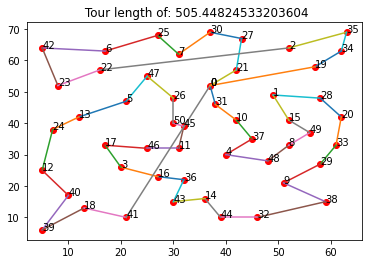

In [175]:
'''
Quick test with data taken from other search
'''

T = [40,30,20,10,5]
n = 7
final = simulated_annealing(np.array([0, 31, 10, 37, 4, 48, 8, 49, 15, 1, 28, 20, 33, 29, 9, 38, 32, 44, 14, 43, 36, 16, 3, 17, 46, 11, 45, 50, 26, 47, 5, 13, 24, 12, 40, 18, 41, 39, 0, 21, 27, 30, 7, 25, 6, 22, 23, 42, 2, 19, 34, 35, 0]
                                    ), EI51, n, T)
graph_drawer(final, EI51, True, True)

[21 49 19 40 12  0 25 18 39 38 31 30 29 47 50 35  6  4 24 26 45 33 37 44
 16 28  2 23 27  5 11  9  1  7 17 41 15 22 32 36 10 14  8 34 13  3 46 42
 48 43 20 21]


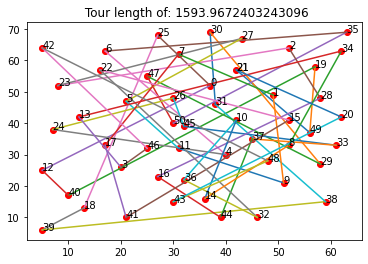

In [179]:
'''
Random data
'''
test = np.arange(0, 51)
np.random.shuffle(test)
test = np.append(test, test[0])
print(test)
graph_drawer(test, EI51, True, True)

[21 49 19 40 12  0 25 18 39 38 31 30 29 47 50 35  6  4 24 26 45 33 37 44
 16 28  2 23 27  5 11  9  1  7 17 41 15 22 32 36 10 14  8 34 13  3 46 42
 48 43 20 21]
first (1, 1593.9672403243096)
1, -9.185747616799972 = 1603.1529879411096 - 1593.9672403243096

repeat
[21 49 19 40 12  0 25 18 39 38 31 30 29 47 50 35  6  4 24 26 45 33 37 44
 16 28  2 23 27  5 11  9  1  7 17 41 15 22 32 36 10 14  8 34 13  3 46 42
 48 43 20 21]
first (1, 1593.9672403243096)
1, 58.2524562199294 = 1535.7147841043802 - 1593.9672403243096

New item in loop(2, 1535.7147841043802)

[21 49 19 40 12  0 25 18 39 38 31 30 29 47 50 35  6 13 24 26 45 33 37 44
 16 28  2 23 27  5 11  9  1  7 17 41 15 22 32 36 10 14  8 34  4  3 46 42
 48 43 20 21]


[21 49 19 40 12  0 25 18 39 38 31 30 29 47 50 35  6 13 24 26 45 33 37 44
 16 28  2 23 27  5 11  9  1  7 17 41 15 22 32 36 10 14  8 34  4  3 46 42
 48 43 20 21]
first (2, 1535.7147841043802)
2, -58.2524562199294 = 1593.9672403243096 - 1535.7147841043802

repeat
[21 49 19 40 12  0 25

repeat
[21 33 48  3 12 45 40 18 39  4 31 37 29 27 42 22  6 24 13 26  1 49  8 44
 32 28  2 35 47  5 43  9 38 15 46 11 23  7  0 20 10 50 30 34 19 25 17 41
 16 14 36 21]
first (30, 1070.3803801981344)
30, -65.66819476138062 = 1136.048574959515 - 1070.3803801981344

repeat
[21 33 48  3 12 45 40 18 39  4 31 37 29 27 42 22  6 24 13 26  1 49  8 44
 32 28  2 35 47  5 43  9 38 15 46 11 23  7  0 20 10 50 30 34 19 25 17 41
 16 14 36 21]
first (30, 1070.3803801981344)
30, -41.380481197512154 = 1111.7608613956465 - 1070.3803801981344

repeat
[21 33 48  3 12 45 40 18 39  4 31 37 29 27 42 22  6 24 13 26  1 49  8 44
 32 28  2 35 47  5 43  9 38 15 46 11 23  7  0 20 10 50 30 34 19 25 17 41
 16 14 36 21]
first (30, 1070.3803801981344)
30, -73.67112003941179 = 1144.0515002375462 - 1070.3803801981344

repeat
[21 33 48  3 12 45 40 18 39  4 31 37 29 27 42 22  6 24 13 26  1 49  8 44
 32 28  2 35 47  5 43  9 38 15 46 11 23  7  0 20 10 50 30 34 19 25 17 41
 16 14 36 21]
first (30, 1070.3803801981344)
30, -37.38


repeat
[21 33 11  3 12 36 40 39 41 45 31 37 29 27 42 22  6 24 13 26  1 49  8 44
 32 28  2 35 47  5 43  9 38 15 48 46 17  7  0 20 10 50 30 34 19 25 23 18
 16 14  4 21]
first (37, 1046.2600909241794)
37, -72.27846678358515 = 1118.5385577077645 - 1046.2600909241794

repeat
[21 33 11  3 12 36 40 39 41 45 31 37 29 27 42 22  6 24 13 26  1 49  8 44
 32 28  2 35 47  5 43  9 38 15 48 46 17  7  0 20 10 50 30 34 19 25 23 18
 16 14  4 21]
first (37, 1046.2600909241794)
37, -95.91526280571657 = 1142.175353729896 - 1046.2600909241794

repeat
[21 33 11  3 12 36 40 39 41 45 31 37 29 27 42 22  6 24 13 26  1 49  8 44
 32 28  2 35 47  5 43  9 38 15 48 46 17  7  0 20 10 50 30 34 19 25 23 18
 16 14  4 21]
first (37, 1046.2600909241794)
37, -95.21050198723538 = 1141.4705929114148 - 1046.2600909241794

repeat
[21 33 11  3 12 36 40 39 41 45 31 37 29 27 42 22  6 24 13 26  1 49  8 44
 32 28  2 35 47  5 43  9 38 15 48 46 17  7  0 20 10 50 30 34 19 25 23 18
 16 14  4 21]
first (37, 1046.2600909241794)
37, 11.388


repeat
[21 33 11  3 16 12 40 39 41 17 31 37 15 27 42 22  6 23 13 26  1 49 38 44
 32 28  2  0 47  5 43  9 29  8 48 46 50  7 30 20 10 45 35 34 19 25 24 18
 36 14  4 21]
first (47, 949.8641510224122)
47, -16.91394181107603 = 966.7780928334882 - 949.8641510224122

repeat
[21 33 11  3 16 12 40 39 41 17 31 37 15 27 42 22  6 23 13 26  1 49 38 44
 32 28  2  0 47  5 43  9 29  8 48 46 50  7 30 20 10 45 35 34 19 25 24 18
 36 14  4 21]
first (47, 949.8641510224122)
47, -48.5548677549757 = 998.4190187773879 - 949.8641510224122

repeat
[21 33 11  3 16 12 40 39 41 17 31 37 15 27 42 22  6 23 13 26  1 49 38 44
 32 28  2  0 47  5 43  9 29  8 48 46 50  7 30 20 10 45 35 34 19 25 24 18
 36 14  4 21]
first (47, 949.8641510224122)
47, -31.93596079100803 = 981.8001118134202 - 949.8641510224122

repeat
[21 33 11  3 16 12 40 39 41 17 31 37 15 27 42 22  6 23 13 26  1 49 38 44
 32 28  2  0 47  5 43  9 29  8 48 46 50  7 30 20 10 45 35 34 19 25 24 18
 36 14  4 21]
first (47, 949.8641510224122)
47, -55.380310518723

first (57, 862.8384789795956)
57, -62.99113165690733 = 925.8296106365029 - 862.8384789795956

repeat
[21 45 11  3 16 12 40 39 41 18 31 28 15 27 42 22  6 23 13  7  1 49 29  8
 38 33  2 30 47  5 43 44 32  9 48 46 50 26  0 20 10 37 35 34 19 25 24 17
 36 14  4 21]
first (57, 862.8384789795956)
57, -34.26360696017559 = 897.1020859397712 - 862.8384789795956

repeat
[21 45 11  3 16 12 40 39 41 18 31 28 15 27 42 22  6 23 13  7  1 49 29  8
 38 33  2 30 47  5 43 44 32  9 48 46 50 26  0 20 10 37 35 34 19 25 24 17
 36 14  4 21]
first (57, 862.8384789795956)
57, -9.930597125439135 = 872.7690761050347 - 862.8384789795956

repeat
[21 45 11  3 16 12 40 39 41 18 31 28 15 27 42 22  6 23 13  7  1 49 29  8
 38 33  2 30 47  5 43 44 32  9 48 46 50 26  0 20 10 37 35 34 19 25 24 17
 36 14  4 21]
first (57, 862.8384789795956)
57, -46.23608077228744 = 909.074559751883 - 862.8384789795956

repeat
[21 45 11  3 16 12 40 39 41 18 31 28 15 27 42 22  6 23 13  7  1 49 29  8
 38 33  2 30 47  5 43 44 32  9 48 46 50 26  

62, -3.168092599209558 = 841.8640778963087 - 838.6959852970991

repeat
[21 45 11  3 16 12 40 39 18 41 31 28 10 27  7 22 13 23  6 42  1 49  8 29
 38 33  2 30 47  5 43 44 32  9 48 46 50 26  0 20 15 37 35 34 19 25 24 17
 36 14  4 21]
first (62, 838.6959852970991)
62, -78.69603490654913 = 917.3920202036483 - 838.6959852970991

repeat
[21 45 11  3 16 12 40 39 18 41 31 28 10 27  7 22 13 23  6 42  1 49  8 29
 38 33  2 30 47  5 43 44 32  9 48 46 50 26  0 20 15 37 35 34 19 25 24 17
 36 14  4 21]
first (62, 838.6959852970991)
62, -87.77766639245522 = 926.4736516895543 - 838.6959852970991

repeat
[21 45 11  3 16 12 40 39 18 41 31 28 10 27  7 22 13 23  6 42  1 49  8 29
 38 33  2 30 47  5 43 44 32  9 48 46 50 26  0 20 15 37 35 34 19 25 24 17
 36 14  4 21]
first (62, 838.6959852970991)
62, -13.588091758394285 = 852.2840770554934 - 838.6959852970991

repeat
[21 45 11  3 16 12 40 39 18 41 31 28 10 27  7 22 13 23  6 42  1 49  8 29
 38 33  2 30 47  5 43 44 32  9 48 46 50 26  0 20 15 37 35 34 19 25 24 17

[21 45 11  3 16 12 40 39 18 41 31 28  2 27  7 22 13 23  6 25  1 49  8 29
 38 33 37 30 47  5 43 44 32  9 48 46 50 26  0 20 15 10 34 35 19 42 24 17
 36 14  4 21]
first (66, 814.7142763004146)
66, -206.03329928188236 = 1020.7475755822969 - 814.7142763004146

repeat
[21 45 11  3 16 12 40 39 18 41 31 28  2 27  7 22 13 23  6 25  1 49  8 29
 38 33 37 30 47  5 43 44 32  9 48 46 50 26  0 20 15 10 34 35 19 42 24 17
 36 14  4 21]
first (66, 814.7142763004146)
66, -126.53031013789689 = 941.2445864383114 - 814.7142763004146

repeat
[21 45 11  3 16 12 40 39 18 41 31 28  2 27  7 22 13 23  6 25  1 49  8 29
 38 33 37 30 47  5 43 44 32  9 48 46 50 26  0 20 15 10 34 35 19 42 24 17
 36 14  4 21]
first (66, 814.7142763004146)
66, -42.741441740587334 = 857.4557180410019 - 814.7142763004146

repeat
[21 45 11  3 16 12 40 39 18 41 31 28  2 27  7 22 13 23  6 25  1 49  8 29
 38 33 37 30 47  5 43 44 32  9 48 46 50 26  0 20 15 10 34 35 19 42 24 17
 36 14  4 21]
first (66, 814.7142763004146)
66, -1.2841691771675414

68, -51.06633399757061 = 860.0627004042452 - 808.9963664066746

repeat
[21 45 11  3 16 12 40 39 18 41 31 28  2 27  7 22 13 23  6 25  1 37  8 38
 29 33 49 30 47  5 43 44 32  9 48 46 50 26  0 20 15 10 34 35 19 42 24 17
 36 14  4 21]
first (68, 808.9963664066746)
68, -41.88300059257767 = 850.8793669992523 - 808.9963664066746

repeat
[21 45 11  3 16 12 40 39 18 41 31 28  2 27  7 22 13 23  6 25  1 37  8 38
 29 33 49 30 47  5 43 44 32  9 48 46 50 26  0 20 15 10 34 35 19 42 24 17
 36 14  4 21]
first (68, 808.9963664066746)
68, -38.25149213929194 = 847.2478585459666 - 808.9963664066746

repeat
[21 45 11  3 16 12 40 39 18 41 31 28  2 27  7 22 13 23  6 25  1 37  8 38
 29 33 49 30 47  5 43 44 32  9 48 46 50 26  0 20 15 10 34 35 19 42 24 17
 36 14  4 21]
first (68, 808.9963664066746)
68, -54.5565061585628 = 863.5528725652374 - 808.9963664066746

repeat
[21 45 11  3 16 12 40 39 18 41 31 28  2 27  7 22 13 23  6 25  1 37  8 38
 29 33 49 30 47  5 43 44 32  9 48 46 50 26  0 20 15 10 34 35 19 42 24 17
 

first (72, 782.6834259780148)
72, -100.18780388811899 = 882.8712298661338 - 782.6834259780148

repeat
[21 45 11  3 16 12 40 39 18 41 31 30  2 27  7 22 13 23  6 25 47 37  8 38
 29 33 20 28  1  5 43 44 32  9 48 46 50 26  0 15 49 10 34 35 19 42 24 17
 36 14  4 21]
first (72, 782.6834259780148)
72, 2.39680745538044 = 780.2866185226344 - 782.6834259780148

New item in loop(73, 780.2866185226344)

[21 45 11  3 16 12 40 39 18 41 31 30  2 27  7 22 13 23  6 25 47 37  8 38
 29 33 20 28  1  5 43 44 32  9 48 46 50 26  0 15 49 10 19 35 34 42 24 17
 36 14  4 21]


[21 45 11  3 16 12 40 39 18 41 31 30  2 27  7 22 13 23  6 25 47 37  8 38
 29 33 20 28  1  5 43 44 32  9 48 46 50 26  0 15 49 10 19 35 34 42 24 17
 36 14  4 21]
first (73, 780.2866185226344)
73, -62.36459372331592 = 842.6512122459503 - 780.2866185226344

repeat
[21 45 11  3 16 12 40 39 18 41 31 30  2 27  7 22 13 23  6 25 47 37  8 38
 29 33 20 28  1  5 43 44 32  9 48 46 50 26  0 15 49 10 19 35 34 42 24 17
 36 14  4 21]
first (73, 780.2866185

81, -2.8591272484765113 = 746.2787827347681 - 743.4196554862916

repeat
[21 31 11  3 17 12 40 39 18 41 50 30 27  2  7 25 13 23  6 22 47 37  8 38
 29 33 20 28  1 45 36 44 32  9 48 46  5 26  0 10 49 15 19 35 34 42 24 16
 43 14  4 21]
first (81, 743.4196554862916)
81, -79.95929294448433 = 823.378948430776 - 743.4196554862916

repeat
[21 31 11  3 17 12 40 39 18 41 50 30 27  2  7 25 13 23  6 22 47 37  8 38
 29 33 20 28  1 45 36 44 32  9 48 46  5 26  0 10 49 15 19 35 34 42 24 16
 43 14  4 21]
first (81, 743.4196554862916)
81, -33.749934132182034 = 777.1695896184737 - 743.4196554862916

repeat
[21 31 11  3 17 12 40 39 18 41 50 30 27  2  7 25 13 23  6 22 47 37  8 38
 29 33 20 28  1 45 36 44 32  9 48 46  5 26  0 10 49 15 19 35 34 42 24 16
 43 14  4 21]
first (81, 743.4196554862916)
81, -60.25250615641369 = 803.6721616427053 - 743.4196554862916

repeat
[21 31 11  3 17 12 40 39 18 41 50 30 27  2  7 25 13 23  6 22 47 37  8 38
 29 33 20 28  1 45 36 44 32  9 48 46  5 26  0 10 49 15 19 35 34 42 24 16

[21 45 11  3 17 12 40 39 18 41 50  2 27 30  7 25 13 23  6 22 47 37  8 38
 29 33 20 28  1 31 36 44 32  9 48 46  5 26  0 10 49 15 19 35 34 42 24 16
 43 14  4 21]
first (83, 733.991407667705)
83, -82.93120862394596 = 816.9226162916509 - 733.991407667705

repeat
[21 45 11  3 17 12 40 39 18 41 50  2 27 30  7 25 13 23  6 22 47 37  8 38
 29 33 20 28  1 31 36 44 32  9 48 46  5 26  0 10 49 15 19 35 34 42 24 16
 43 14  4 21]
first (83, 733.991407667705)
83, -85.11129923407361 = 819.1027069017786 - 733.991407667705

repeat
[21 45 11  3 17 12 40 39 18 41 50  2 27 30  7 25 13 23  6 22 47 37  8 38
 29 33 20 28  1 31 36 44 32  9 48 46  5 26  0 10 49 15 19 35 34 42 24 16
 43 14  4 21]
first (83, 733.991407667705)
83, -112.67895217432329 = 846.6703598420282 - 733.991407667705

repeat
[21 45 11  3 17 12 40 39 18 41 50  2 27 30  7 25 13 23  6 22 47 37  8 38
 29 33 20 28  1 31 36 44 32  9 48 46  5 26  0 10 49 15 19 35 34 42 24 16
 43 14  4 21]
first (83, 733.991407667705)
83, -104.55860969265768 = 838.550

first (84, 729.5161846049668)
84, -83.05695794119504 = 812.5731425461619 - 729.5161846049668

repeat
[21 45 11  3 17 12 40 39 18 41 50  2 27 30  7 25 13 23  6 22 47 37  8 38
 29 33 20 28  1 10 36 44 32  9 48 46  5 26  0 31 49 15 19 35 34 42 24 16
 43 14  4 21]
first (84, 729.5161846049668)
84, -18.495338351008172 = 748.011522955975 - 729.5161846049668

repeat
[21 45 11  3 17 12 40 39 18 41 50  2 27 30  7 25 13 23  6 22 47 37  8 38
 29 33 20 28  1 10 36 44 32  9 48 46  5 26  0 31 49 15 19 35 34 42 24 16
 43 14  4 21]
first (84, 729.5161846049668)
84, -76.77645115315386 = 806.2926357581207 - 729.5161846049668

repeat
[21 45 11  3 17 12 40 39 18 41 50  2 27 30  7 25 13 23  6 22 47 37  8 38
 29 33 20 28  1 10 36 44 32  9 48 46  5 26  0 31 49 15 19 35 34 42 24 16
 43 14  4 21]
first (84, 729.5161846049668)
84, 4.252549217921455 = 725.2636353870454 - 729.5161846049668

New item in loop(85, 725.2636353870454)

[21 45 11  3 17 12 40 39 18 41 50  2 27 30  7 25 13 23  6 22 47 37  8 38
 29 33 20 


repeat
[21 45 11  3 17 12 40 39 18 41 50  2 27 30  7 47 13 23 22  6 25 37  8 38
 29 33 20 28  1 10 36 44 32  9 48 46  5 26  0 31 15 49 19 34 35 42 24 16
 43 14  4 21]
first (88, 720.1731265791067)
88, -73.37880398129505 = 793.5519305604017 - 720.1731265791067

repeat
[21 45 11  3 17 12 40 39 18 41 50  2 27 30  7 47 13 23 22  6 25 37  8 38
 29 33 20 28  1 10 36 44 32  9 48 46  5 26  0 31 15 49 19 34 35 42 24 16
 43 14  4 21]
first (88, 720.1731265791067)
88, -56.023764252413685 = 776.1968908315204 - 720.1731265791067

repeat
[21 45 11  3 17 12 40 39 18 41 50  2 27 30  7 47 13 23 22  6 25 37  8 38
 29 33 20 28  1 10 36 44 32  9 48 46  5 26  0 31 15 49 19 34 35 42 24 16
 43 14  4 21]
first (88, 720.1731265791067)
88, -51.323111634786756 = 771.4962382138934 - 720.1731265791067

repeat
[21 45 11  3 17 12 40 39 18 41 50  2 27 30  7 47 13 23 22  6 25 37  8 38
 29 33 20 28  1 10 36 44 32  9 48 46  5 26  0 31 15 49 19 34 35 42 24 16
 43 14  4 21]
first (88, 720.1731265791067)
88, -83.469279032


repeat
[21 45 50  3 17 12 40 39 18 41 11  2 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 28  1 37  4 44 32  9 48 46  5 26  0 31 15 49 19 34 35 47 24 16
 43 14 36 21]
first (93, 708.6282630546798)
93, -106.1386116064466 = 814.7668746611264 - 708.6282630546798

repeat
[21 45 50  3 17 12 40 39 18 41 11  2 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 28  1 37  4 44 32  9 48 46  5 26  0 31 15 49 19 34 35 47 24 16
 43 14 36 21]
first (93, 708.6282630546798)
93, -108.96046403721846 = 817.5887270918982 - 708.6282630546798

repeat
[21 45 50  3 17 12 40 39 18 41 11  2 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 28  1 37  4 44 32  9 48 46  5 26  0 31 15 49 19 34 35 47 24 16
 43 14 36 21]
first (93, 708.6282630546798)
93, -137.28362654032367 = 845.9118895950035 - 708.6282630546798

repeat
[21 45 50  3 17 12 40 39 18 41 11  2 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 28  1 37  4 44 32  9 48 46  5 26  0 31 15 49 19 34 35 47 24 16
 43 14 36 21]
first (93, 708.6282630546798)
93, -10.737899023


repeat
[21 45 50  3 17 12 40 39 18 41 11 47 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 49  1 37  4 44 32  9 48 46  5 26  0 31 15 28 19 34 35  2 24 16
 43 14 36 21]
first (95, 703.0925652659693)
95, -105.03541157037785 = 808.1279768363471 - 703.0925652659693

repeat
[21 45 50  3 17 12 40 39 18 41 11 47 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 49  1 37  4 44 32  9 48 46  5 26  0 31 15 28 19 34 35  2 24 16
 43 14 36 21]
first (95, 703.0925652659693)
95, -5.497458863333577 = 708.5900241293028 - 703.0925652659693

repeat
[21 45 50  3 17 12 40 39 18 41 11 47 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 49  1 37  4 44 32  9 48 46  5 26  0 31 15 28 19 34 35  2 24 16
 43 14 36 21]
first (95, 703.0925652659693)
95, -32.51946547032048 = 735.6120307362897 - 703.0925652659693

repeat
[21 45 50  3 17 12 40 39 18 41 11 47 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 49  1 37  4 44 32  9 48 46  5 26  0 31 15 28 19 34 35  2 24 16
 43 14 36 21]
first (95, 703.0925652659693)
95, -26.0419779607

97, -46.99755608879423 = 728.9579265160816 - 681.9603704272873

repeat
[21 45 50  3 17 12 40 39 18 41 24 47 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 49  1 37  4 44 32  9 48 11  5 26  0 31 15 28 19 34 35  2 46 16
 43 14 36 21]
first (97, 681.9603704272873)
97, -132.85554435188897 = 814.8159147791763 - 681.9603704272873

repeat
[21 45 50  3 17 12 40 39 18 41 24 47 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 49  1 37  4 44 32  9 48 11  5 26  0 31 15 28 19 34 35  2 46 16
 43 14 36 21]
first (97, 681.9603704272873)
97, -78.45588729242877 = 760.4162577197161 - 681.9603704272873

repeat
[21 45 50  3 17 12 40 39 18 41 24 47 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 49  1 37  4 44 32  9 48 11  5 26  0 31 15 28 19 34 35  2 46 16
 43 14 36 21]
first (97, 681.9603704272873)
97, -111.01823998551072 = 792.978610412798 - 681.9603704272873

repeat
[21 45 50  3 17 12 40 39 18 41 24 47 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 49  1 37  4 44 32  9 48 11  5 26  0 31 15 28 19 34 35  2 46 16

[21 45 50 46 17 12 40 39 18 41 24 47 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 49  1 37  4 44 32  9 48 11  5 26  0 31 15 28 19 34 35  2  3 16
 43 14 36 21]
first (98, 680.8425408788448)
98, -138.30693621417663 = 819.1494770930215 - 680.8425408788448

repeat
[21 45 50 46 17 12 40 39 18 41 24 47 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 49  1 37  4 44 32  9 48 11  5 26  0 31 15 28 19 34 35  2  3 16
 43 14 36 21]
first (98, 680.8425408788448)
98, -17.839686317067503 = 698.6822271959123 - 680.8425408788448

repeat
[21 45 50 46 17 12 40 39 18 41 24 47 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 49  1 37  4 44 32  9 48 11  5 26  0 31 15 28 19 34 35  2  3 16
 43 14 36 21]
first (98, 680.8425408788448)
98, -38.269246253046504 = 719.1117871318913 - 680.8425408788448

repeat
[21 45 50 46 17 12 40 39 18 41 24 47 27 30  7 22 13 23 42  6 25 10  8 38
 29 33 20 49  1 37  4 44 32  9 48 11  5 26  0 31 15 28 19 34 35  2  3 16
 43 14 36 21]
first (98, 680.8425408788448)
98, -35.54054704086457 =

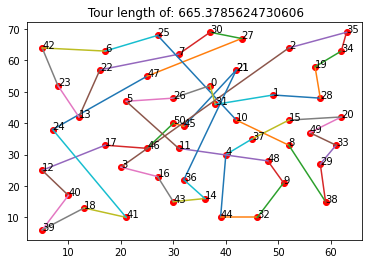

In [183]:
T = [40,30,20,10,5]
n =  100
final = simulated_annealing(test, EI51, n, T)
graph_drawer(final, EI51, True, True)